범주형 데이터 인코딩 방법을 숙달

In [1]:
!unzip '/content/drive/MyDrive/kaggle_data/cat-in-the-dat.zip' -d cat

Archive:  /content/drive/MyDrive/kaggle_data/cat-in-the-dat.zip
  inflating: cat/sample_submission.csv  
  inflating: cat/test.csv            
  inflating: cat/train.csv           


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('/content/cat/train.csv',index_col='id')
test = pd.read_csv('/content/cat/test.csv', index_col='id')

In [4]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [5]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


피처 요약표

In [6]:
def resumetable(df):
  print(f'데이터셋 형상 : {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫번째 값'] = df.loc[0].values
  summary['두번째 값'] = df.loc[1].values
  summary['세번째 값'] = df.loc[2].values

  return summary
resumetable(train)

데이터셋 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값,세번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


순서형 데이터의 순서를 파악 ord_0 ~ ord_2

In [7]:
for i in range(3):
  feature = 'ord_' + str(i)
  print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [8]:
for i in range(3,6):
  feature = 'ord_' + str(i)
  print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [9]:
for feature in ['day','month','target']:
  print(f'{feature} 고윳값 : {train[feature].unique()}')

day 고윳값 : [2 7 5 4 3 1 6]
month 고윳값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값 : [0 1]


시각화

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 1.0, 'Target Distribution')

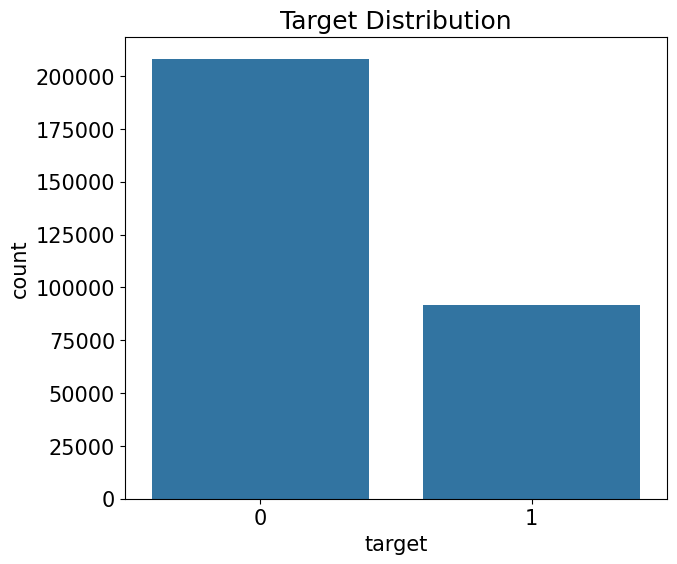

In [11]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [12]:
def write_percent(ax, total_size):
  for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    left_coord = p.get_x()
    percent = height / total_size * 100

    ax.text(left_coord + width/2, height + total_size*0.001, f'{percent:1.1f}%', ha='center')

Text(0.5, 1.0, 'Target Distribution')

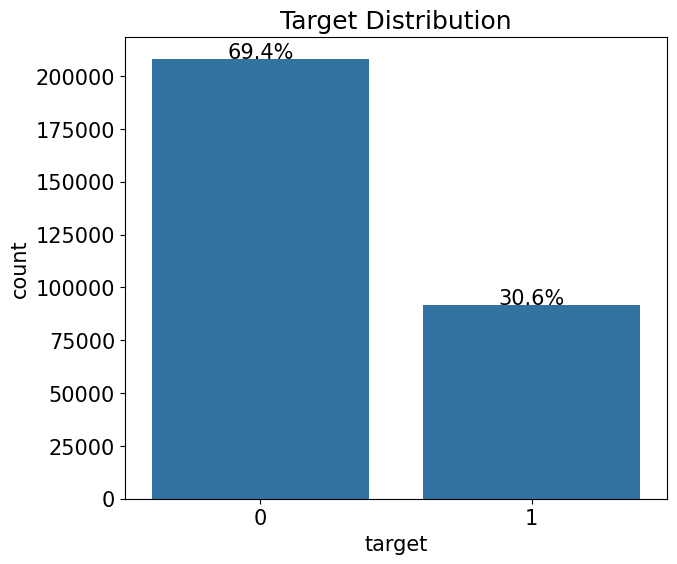

In [13]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

bin  이진데이터

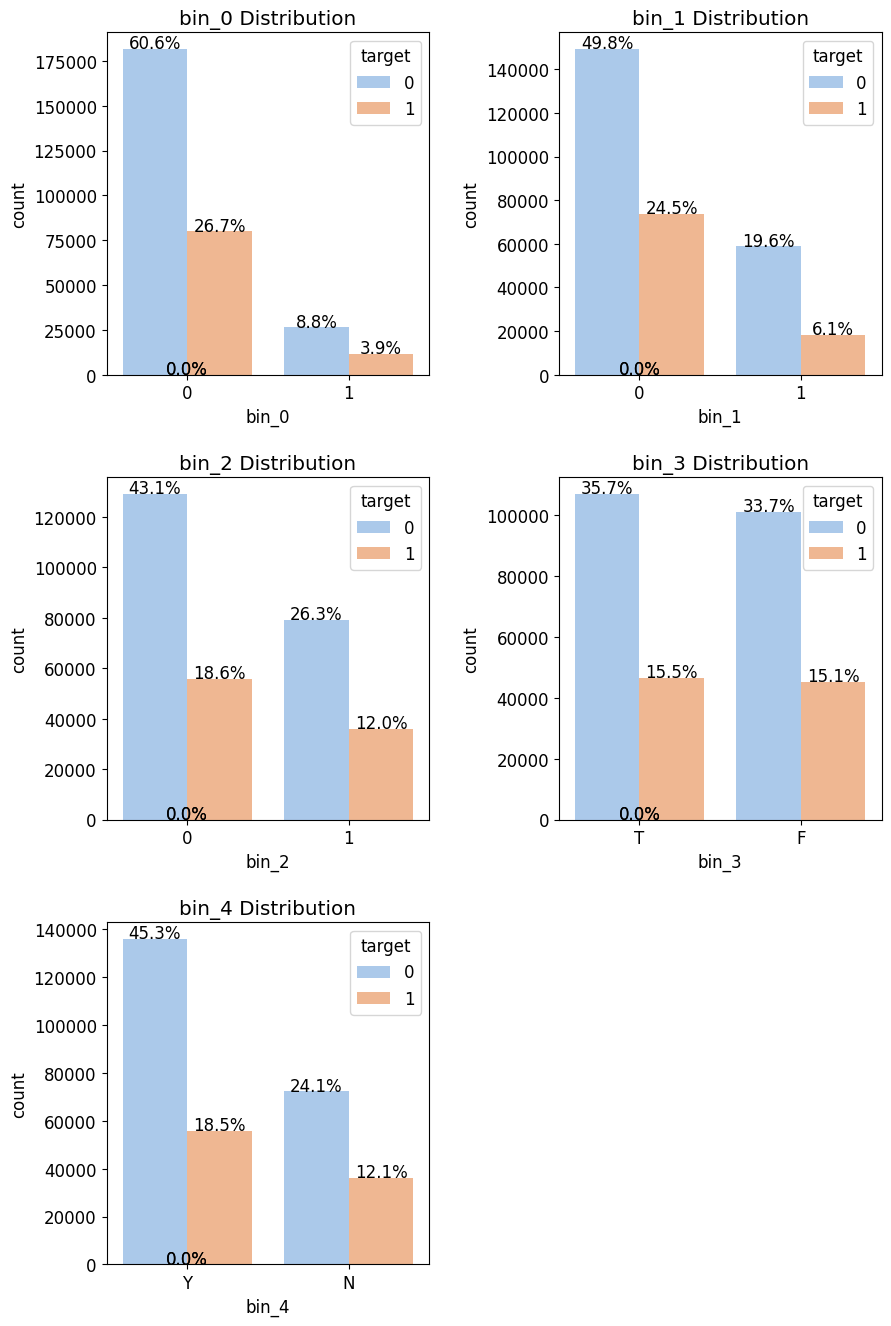

In [14]:
import matplotlib.gridspec as gridspec
mpl.rc('font',size=12)
gird = gridspec.GridSpec(3,2)
plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']
for idx, feature in enumerate(bin_features):
  ax = plt.subplot(gird[idx])
  sns.countplot(x=feature, hue='target', data=train, palette='pastel')
  ax.set_title(f'{feature} Distribution')
  write_percent(ax, len(train))

명목형 피처
  - 교차분석표

In [15]:
def get_corsstab(df, feature):
  crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
  crosstab = crosstab.reset_index()
  return crosstab

In [16]:
cosstab = get_corsstab(train, 'nom_0')
cosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


포인트 플랏 함수

In [17]:
def plot_pointplot(ax, feature, crosstab):
  ax2 = ax.twinx()  # x축은 공유하고 y축은공유하지 않는 새로운 축 생성
  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order = crosstab[feature].values,
                      color = 'black',
                      legend=False)
  ax2.set_ylim(crosstab[1].min() - 5, crosstab[1].max()*1.1)
  ax2.set_ylabel('Target 1 Ratio(%)')

피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수

In [18]:
def plot_cat_dist_with_true_ratio(df,feature,num_rows,num_cols,size=(15,20)):
  plt.figure(figsize=size)
  grid = gridspec.GridSpec(num_rows,num_cols)
  plt.subplots_adjust(wspace=0.45, hspace=0.3)

  for idx, feature in enumerate(feature):
    ax = plt.subplot(grid[idx])
    crosstab = get_corsstab(df,feature)

    sns.countplot(x=feature, data=df, order=crosstab[feature].values, ax=ax)
    write_percent(ax, len(df))
    plot_pointplot(ax, feature, crosstab)
    ax.set_title(f'{feature} Distribution')

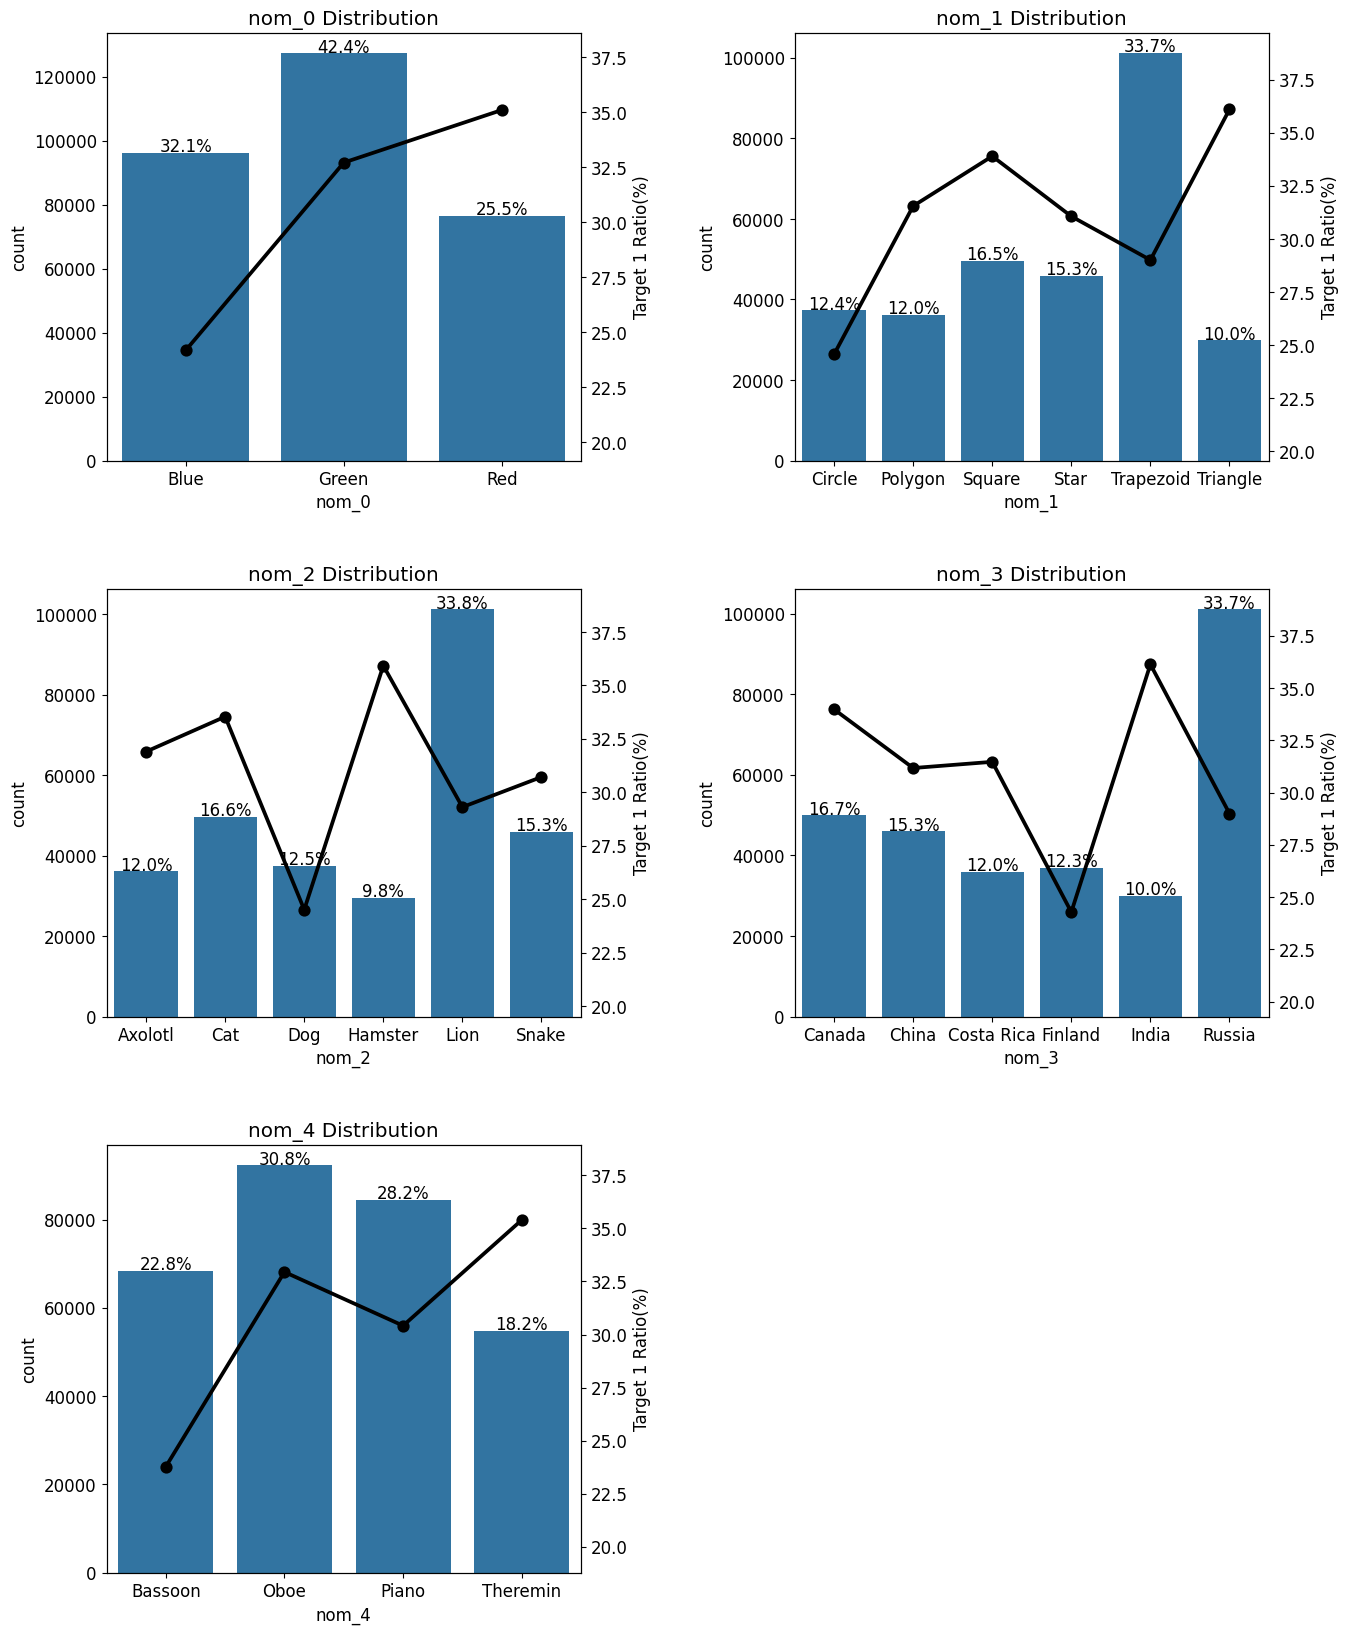

In [19]:
nom_features = ['nom_0','nom_1','nom_2','nom_3','nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, 3, 2)

순서형 피처

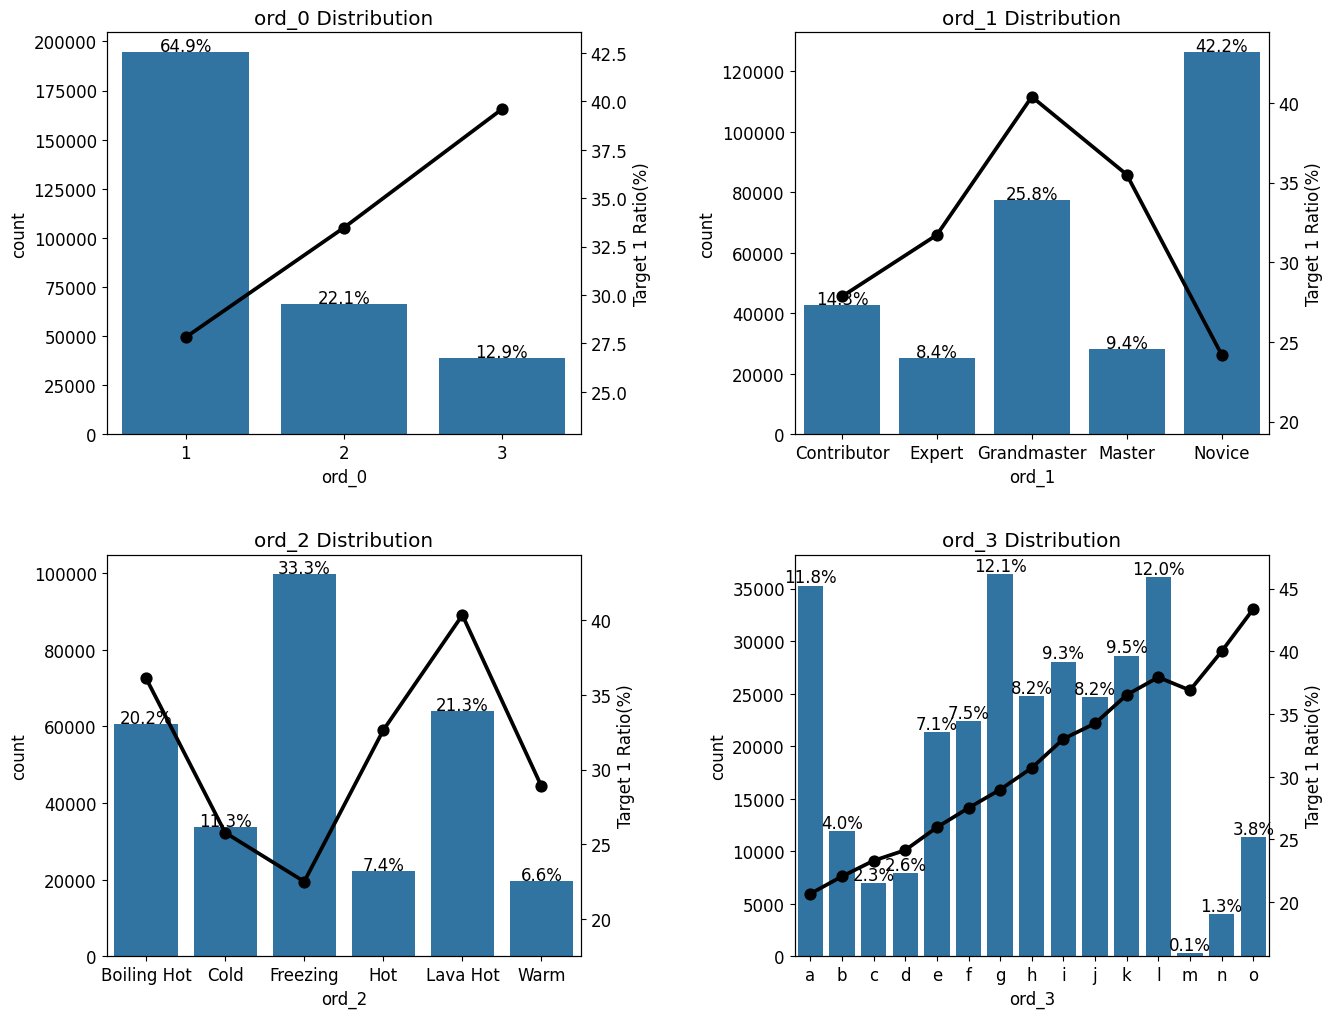

In [20]:
ord_features = ['ord_0','ord_1','ord_2','ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, 2, 2,size=(15,12))

순서형 피처들은 피처값들의 순서를 정렬

In [21]:
from pandas.api.types import CategoricalDtype
ord_1_value = ['Novice','Contributor','Expert','Master','Grandmaster']
ord_2_value = ['Freezing','Cold','Warm','Hot','Boiling Hot','Lava Hot']

ord_1_dty = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dty = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dty)
train['ord_2'] = train['ord_2'].astype(ord_2_dty)

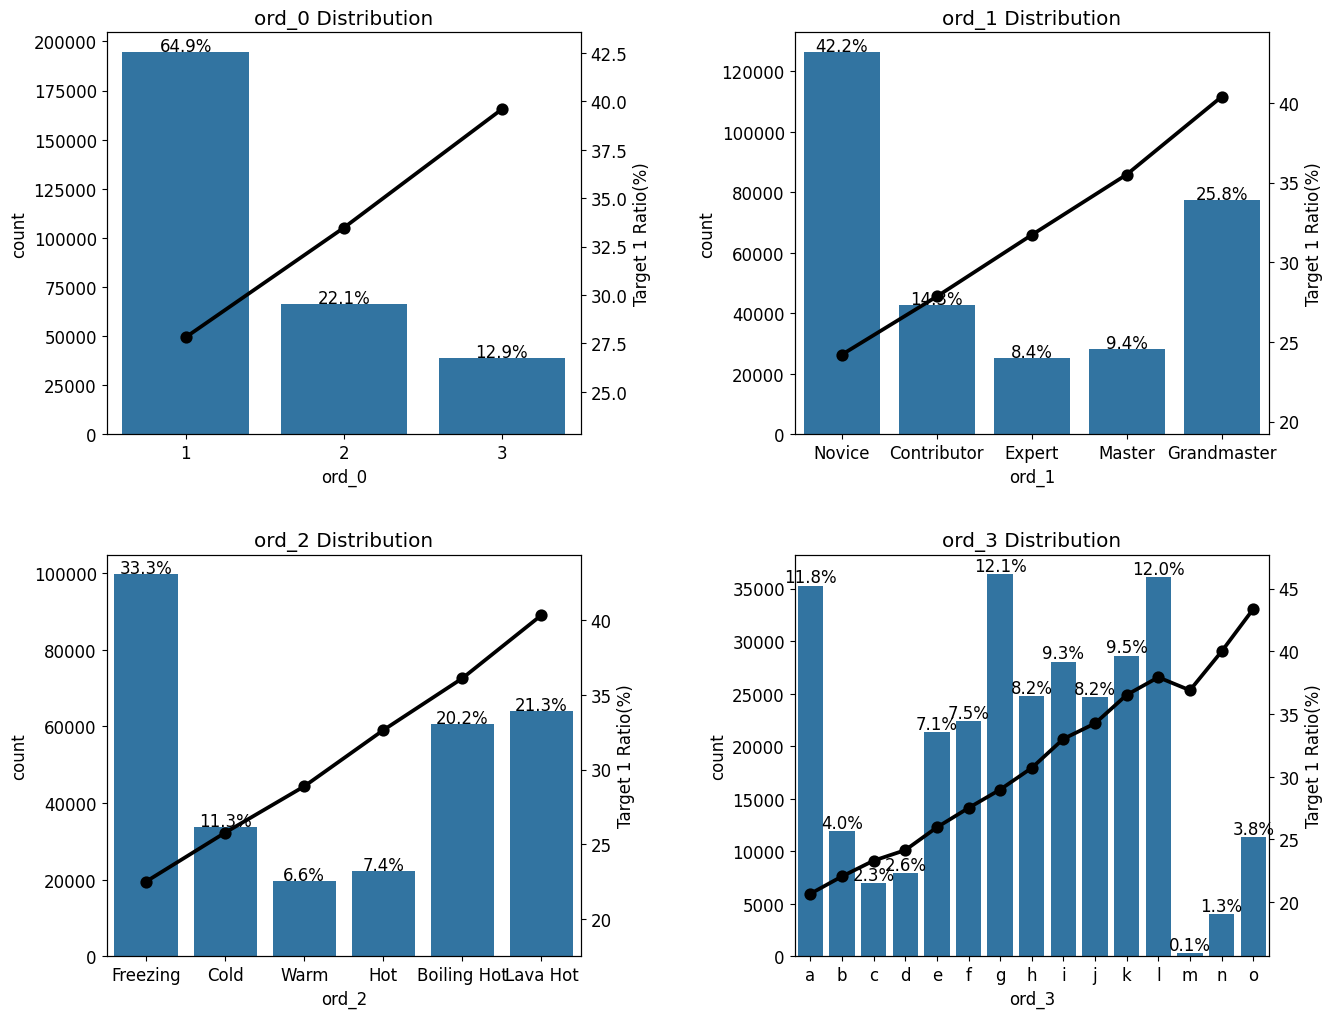

In [22]:
plot_cat_dist_with_true_ratio(train, ord_features, 2, 2,size=(15,12))

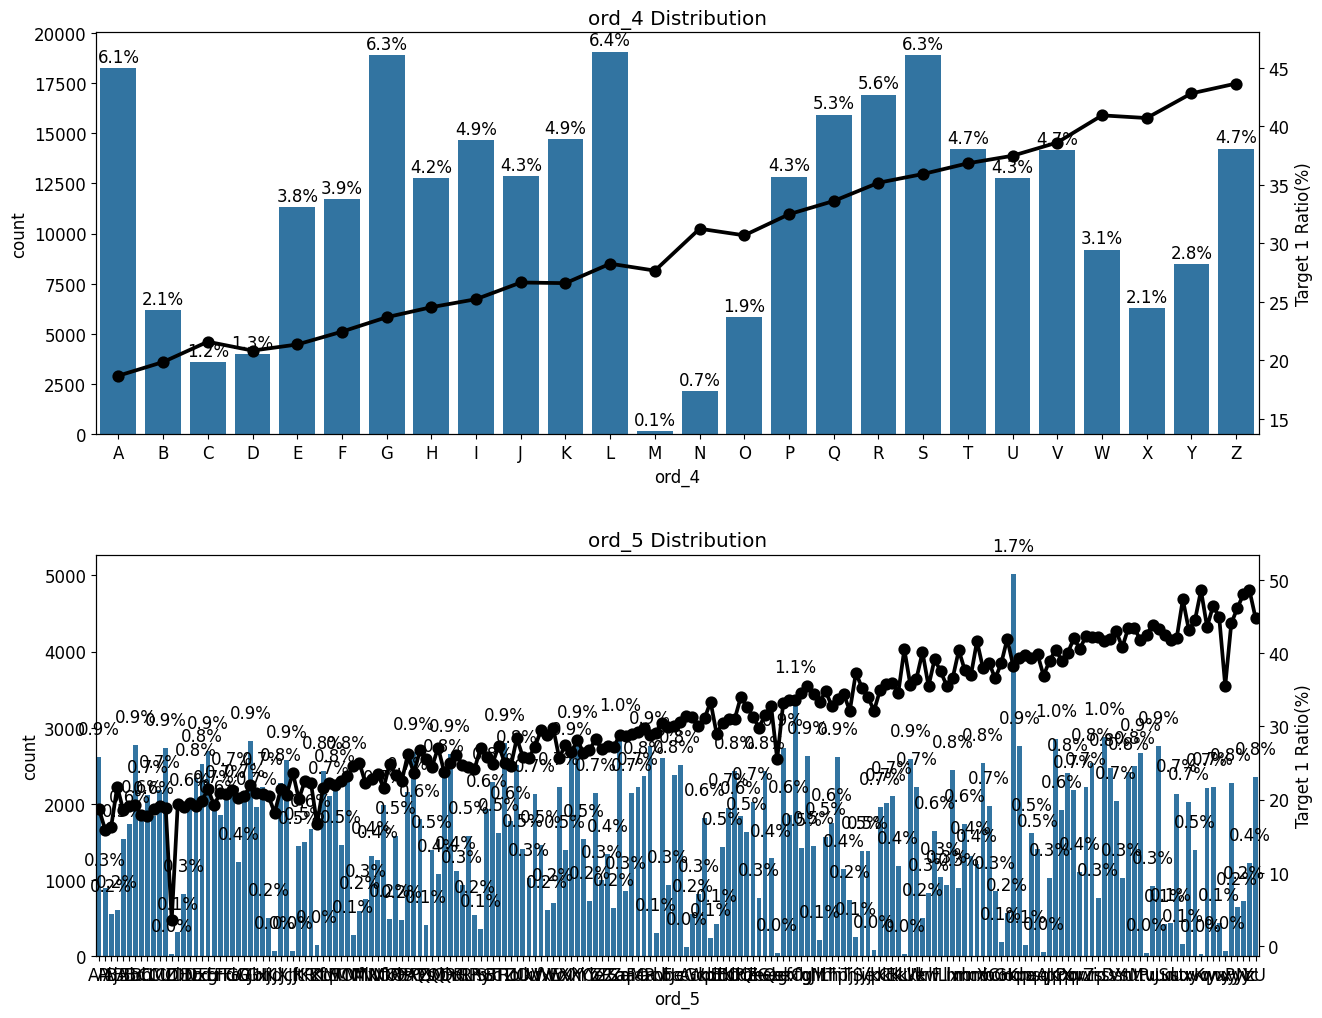

In [25]:
# ord_4, ord_5
plot_cat_dist_with_true_ratio(train, ['ord_4','ord_5'], 2, 1,size=(15,12) )

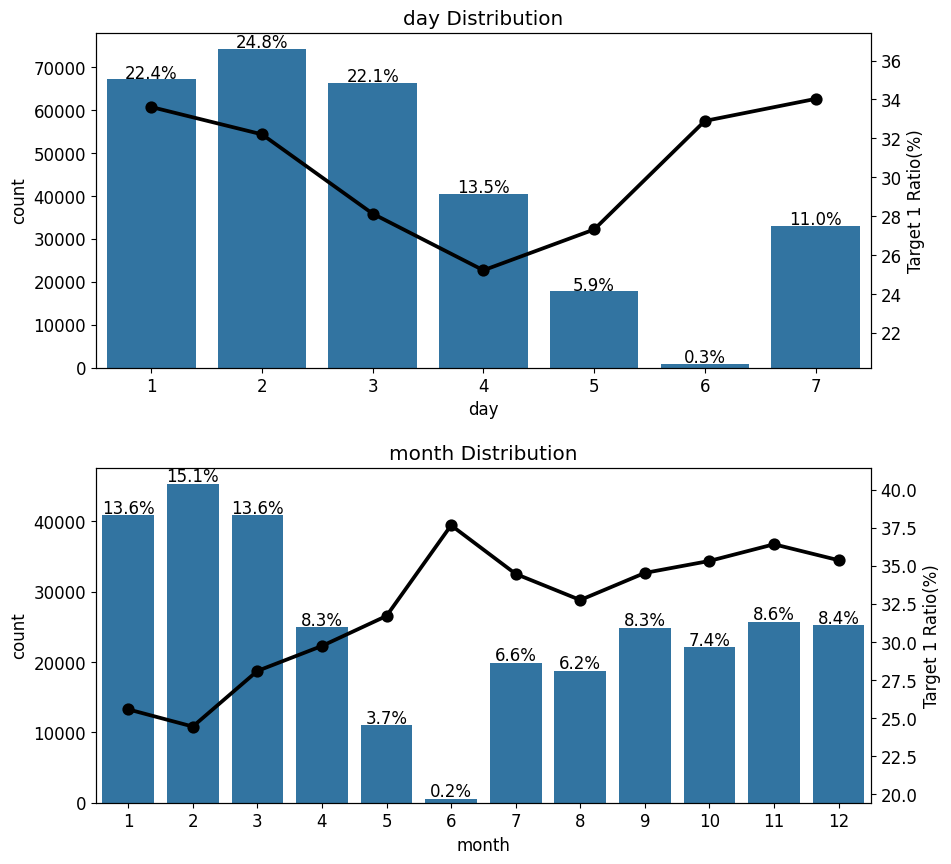

In [26]:
# 날자피처분포
date_features = ['day','month']
plot_cat_dist_with_true_ratio(train, date_features, 2, 1,size=(10,10))

기본모델

In [62]:
train = pd.read_csv('/content/cat/train.csv',index_col='id')
test = pd.read_csv('/content/cat/test.csv', index_col='id')

In [63]:
# 데이터 합치기, 타깃값 제거
all_data = pd.concat([train,test])
all_data.drop('target', axis=1, inplace=True)

In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

In [65]:
# 훈련데이터 ,테스트 데이터 나누기
num_train = len(train)
train_x = all_data_encoded[:num_train]
test_x = all_data_encoded[num_train:]
y = train['target']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, y, test_size=0.1, stratify=y, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [68]:
pred = logistic_model.predict(X_valid)
pred_proba = logistic_model.predict_proba(X_valid)

In [69]:
pred[:2], pred_proba[:2]

(array([0, 0]),
 array([[0.61384079, 0.38615921],
        [0.87987452, 0.12012548]]))

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
y_valid_preds = pred_proba[:,1]
roc_auc_score(y_valid, y_valid_preds)

0.7949655743942423

성능 개선
  - 피처맞춤 인코딩
    - 이진피처, 순서형피처, 명목형피처, 날짜피처
  - 스케일링
  - 하이퍼 파라메터 튜닝

In [72]:
# 데이터 합치기, 타깃값 제거
all_data = pd.concat([train,test])
all_data.drop('target', axis=1, inplace=True)

In [73]:
# 이진피처  0과 1로만 구성
all_data['bin_3'].value_counts(),  all_data['bin_4'].value_counts()

(bin_3
 T    255913
 F    244087
 Name: count, dtype: int64,
 bin_4
 Y    319640
 N    180360
 Name: count, dtype: int64)

In [74]:
all_data['bin_3'] = all_data['bin_3'].map({
    'T':1, 'F':0
    })
all_data['bin_4'] = all_data['bin_4'].map({
    'Y':1, 'N':0
    })

In [75]:
# 순서형 데이터

In [76]:
all_data['ord_0'].unique()

array([2, 1, 3])

In [77]:
print(all_data['ord_1'].unique())
print(all_data['ord_2'].unique())
print(all_data['ord_3'].unique())
print(all_data['ord_4'].unique())
print(all_data['ord_5'].unique())

['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 

In [78]:
ord1dict = {
    'Novice':0,
    'Contributor':1,
    'Expert':2,
    'Master':3,
    'Grandmaster':4
}
ord2_dict = {
    'Freezing':0,
    'Cold':1,
    'Warm':2,
    'Hot':3,
    'Boiling Hot':4,
    'Lava Hot':5
}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2_dict)

In [79]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
ord_345 = ['ord_3','ord_4','ord_5']
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype=object),
 array(['AP', 'Ai', 'Aj', 'BA', 'BE', 'Bb', 'Bd', 'Bn', 'CL', 'CM', 'CU',
        'CZ', 'Cl', 'DH', 'DN', 'Dc', 'Dx', 'Ed', 'Eg', 'Er', 'FI', 'Fd',
        'Fo', 'GD', 'GJ', 'Gb', 'Gx', 'Hj', 'IK', 'Id', 'JX', 'Jc', 'Jf',
        'Jt', 'KR', 'KZ', 'Kf', 'Kq', 'LE', 'MC', 'MO', 'MV', 'Mf', 'Ml',
        'Mx', 'NV', 'Nf', 'Nk', 'OR', 'Ob', 'Os', 'PA', 'PQ', 'PZ', 'Ps',
        'QM', 'Qb', 'Qh', 'Qo', 'RG', 'RL', 'RP', 'Rm', 'Ry', 'SB', 'Sc',
        'TR', 'TZ', 'To', 'UO', 'Uk', 'Uu', 'Vf', 'Vx', 'WE', 'Wc', 'Wv',
        'XI', 'Xh', 'Xi', 'YC', 'Yb', 'Ye', 'ZR', 'ZS', 'Zc', 'Zq', 'aF',
        'aM', 'aO', 'aP', 'ac', 'av', 'bF', 'bJ', 'be', 'cA', 'cG', 'cW',
        'ck', 'cp', 'dB', 'dE', 'dN', 'dO', 'dP', 'dQ', 'd

In [80]:
# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
  print(feature)
  print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [59]:
ord_encoder.categories_

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype=object),
 array(['AP', 'Ai', 'Aj', 'BA', 'BE', 'Bb', 'Bd', 'Bn', 'CL', 'CM', 'CU',
        'CZ', 'Cl', 'DH', 'DN', 'Dc', 'Dx', 'Ed', 'Eg', 'Er', 'FI', 'Fd',
        'Fo', 'GD', 'GJ', 'Gb', 'Gx', 'Hj', 'IK', 'Id', 'JX', 'Jc', 'Jf',
        'Jt', 'KR', 'KZ', 'Kf', 'Kq', 'LE', 'MC', 'MO', 'MV', 'Mf', 'Ml',
        'Mx', 'NV', 'Nf', 'Nk', 'OR', 'Ob', 'Os', 'PA', 'PQ', 'PZ', 'Ps',
        'QM', 'Qb', 'Qh', 'Qo', 'RG', 'RL', 'RP', 'Rm', 'Ry', 'SB', 'Sc',
        'TR', 'TZ', 'To', 'UO', 'Uk', 'Uu', 'Vf', 'Vx', 'WE', 'Wc', 'Wv',
        'XI', 'Xh', 'Xi', 'YC', 'Yb', 'Ye', 'ZR', 'ZS', 'Zc', 'Zq', 'aF',
        'aM', 'aO', 'aP', 'ac', 'av', 'bF', 'bJ', 'be', 'cA', 'cG', 'cW',
        'ck', 'cp', 'dB', 'dE', 'dN', 'dO', 'dP', 'dQ', 'd

In [84]:
# 명목형피처는 순서에 상관 없음
nom_features = [f'nom_{i}' for i in range(10)]
all_data[nom_features]

,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
id,,,,,,,,,,
0,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51
1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21
2,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0
3,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71
4,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7
...,...,...,...,...,...,...,...,...,...,...
499995,Green,Square,Lion,Canada,Theremin,6c90f81cd,a406a5f12,d02a6b0ba,9e4b23160,acc31291f
499996,Green,Trapezoid,Lion,China,Piano,2d61990e2,520806ce2,d2d8eabdb,cfbd87ed0,eae3446d0
499997,Green,Trapezoid,Lion,Canada,Oboe,488406659,28645754b,22831fffe,1108bcd6c,33dd3cf4b


In [86]:
onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])
encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [87]:
# 기존 명목형 피처 제거
all_data.drop(nom_features, axis=1, inplace=True)

In [88]:
# 날자에도 원핫을 적용
date_features = ['day','month']
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data.drop(date_features, axis=1, inplace=True) # 기존 날자피처 삭제
encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

피처 엔지니어링 : 피처 스케일링
  - 다른피처와 맞추기 위해서 0~1사이로 조정하는 min-max

In [89]:
from sklearn.preprocessing import MinMaxScaler
ord_features = [f'ord_{i}' for i in range(6)]
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

인코딩 및 스케일링된 피처 합치기

In [92]:
from scipy import sparse
all_data_sparse = sparse.hstack([
    sparse.csr_matrix(all_data),
    encoded_nom_matrix,
    encoded_date_matrix],
    format = 'csr'
)

In [93]:
all_data_sparse

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [94]:
num_train = len(train)  # 훈련데이터의 개수
train_x = all_data_sparse[:num_train]
test_x = all_data_sparse[num_train:]
y = train['target']

In [95]:
# 훈련데이터, 검증데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_x, y, test_size=0.1, stratify=y, random_state=42)

파이퍼 파라메터 최적화

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()
lr_params = {
    'C': [0.1, 0.125, 0.2],
    'max_iter': [800, 900, 1000],
    'solver': ['liblinear'],
    'random_state': [42]
}
grid_model = GridSearchCV(logistic_model, param_grid=lr_params, scoring='roc_auc', cv=5)
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}

성능검증

In [97]:
y_valid_preds =  grid_model.predict_proba(X_valid)[:,1]

In [98]:
roc_auc_score(y_valid, y_valid_preds)

0.8015405967261301